# 1. CIFAR 10 model 网络模型

① 下面用 CIFAR 10 model网络来完成分类问题，网络模型如下图所示。

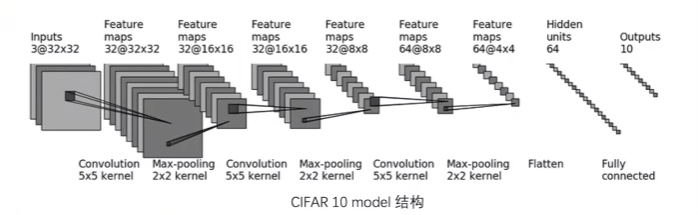

# 2. DataLoader加载数据集

In [1]:
import torchvision
from torch import nn
from torch.utils.data import DataLoader

# 准备数据集
train_data = torchvision.datasets.CIFAR10("./data",train=True,transform=torchvision.transforms.ToTensor(),download=True)
test_data = torchvision.datasets.CIFAR10("./data",train=False,transform=torchvision.transforms.ToTensor(),download=True)

# length 长度
train_data_size = len(train_data)
test_data_size = len(test_data)
# 如果train_data_size=10，则打印：训练数据集的长度为：10
print("训练数据集的长度：{}".format(train_data_size))
print("测试数据集的长度：{}".format(test_data_size))

# 利用 Dataloader 来加载数据集
train_dataloader = DataLoader(train_data_size, batch_size=64)        
test_dataloader = DataLoader(test_data_size, batch_size=64)

Files already downloaded and verified
Files already downloaded and verified
训练数据集的长度：50000
测试数据集的长度：10000


# 3. 测试网络正确

In [2]:
import torch
from torch import nn

# 搭建神经网络
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()        
        self.model1 = nn.Sequential(
            nn.Conv2d(3,32,5,1,2),  # 输入通道3，输出通道32，卷积核尺寸5×5，步长1，填充2    
            nn.MaxPool2d(2),
            nn.Conv2d(32,32,5,1,2),
            nn.MaxPool2d(2),
            nn.Conv2d(32,64,5,1,2),
            nn.MaxPool2d(2),
            nn.Flatten(),  # 展平后变成 64*4*4 了
            nn.Linear(64*4*4,64),
            nn.Linear(64,10)
        )
        
    def forward(self, x):
        x = self.model1(x)
        return x
    
if __name__ == '__main__':
    tudui = Tudui()
    input = torch.ones((64,3,32,32))
    output = tudui(input)
    print(output.shape)  # 测试输出的尺寸是不是我们想要的

torch.Size([64, 10])


# 4. 网络训练数据

In [2]:
import torchvision
from torch import nn
from torch.utils.data import DataLoader
import torch
# from model import * 相当于把 model中的所有内容写到这里，这里直接把 model 写在这里
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()        
        self.model1 = nn.Sequential(
            nn.Conv2d(3,32,5,1,2),  # 输入通道3，输出通道32，卷积核尺寸5×5，步长1，填充2    
            nn.MaxPool2d(2),
            nn.Conv2d(32,32,5,1,2),
            nn.MaxPool2d(2),
            nn.Conv2d(32,64,5,1,2),
            nn.MaxPool2d(2),
            nn.Flatten(),  # 展平后变成 64*4*4 了
            nn.Linear(64*4*4,64),
            nn.Linear(64,10)
        )
        
    def forward(self, x):
        x = self.model1(x)
        return x

# 准备数据集
train_data = torchvision.datasets.CIFAR10("./data",train=True,transform=torchvision.transforms.ToTensor(),download=True)
test_data = torchvision.datasets.CIFAR10("./data",train=False,transform=torchvision.transforms.ToTensor(),download=True)

# length 长度
train_data_size = len(train_data)
test_data_size = len(test_data)
# 如果train_data_size=10，则打印：训练数据集的长度为：10
print("训练数据集的长度：{}".format(train_data_size))
print("测试数据集的长度：{}".format(test_data_size))

# 利用 Dataloader 来加载数据集
train_dataloader = DataLoader(train_data, batch_size=64)        
test_dataloader = DataLoader(test_data, batch_size=64)

# 创建网络模型
tudui = Tudui() 

# 损失函数
loss_fn = nn.CrossEntropyLoss() # 交叉熵，fn 是 fuction 的缩写

# 优化器
learning = 0.01  # 1e-2 就是 0.01 的意思
optimizer = torch.optim.SGD(tudui.parameters(),learning)   # 随机梯度下降优化器  

# 设置网络的一些参数
# 记录训练的次数
total_train_step = 0

# 训练的轮次
epoch = 10

for i in range(epoch):
    print("-----第 {} 轮训练开始-----".format(i+1))
    
    # 训练步骤开始
    for data in train_dataloader:
        imgs, targets = data
        outputs = tudui(imgs)
        loss = loss_fn(outputs, targets) # 计算实际输出与目标输出的差距
        
        # 优化器对模型调优
        optimizer.zero_grad()  # 梯度清零
        loss.backward() # 反向传播，计算损失函数的梯度
        optimizer.step()   # 根据梯度，对网络的参数进行调优
        
        total_train_step = total_train_step + 1
        #print("训练次数：{}，Loss：{}".format(total_train_step,loss))  # 方式一：获得loss值
        #print("训练次数：{}，Loss：{}".format(total_train_step,loss.item()))  # 方式二：获得loss值
        print(f"train:{total_train_step} loss_item:{loss.item()} loss{loss}")

训练数据集的长度：50000
测试数据集的长度：10000
-----第 1 轮训练开始-----
train:1 loss_item:2.313098192214966 loss2.313098192214966
train:2 loss_item:2.3148763179779053 loss2.3148763179779053
train:3 loss_item:2.2951467037200928 loss2.2951467037200928
train:4 loss_item:2.303816080093384 loss2.303816080093384
train:5 loss_item:2.313544750213623 loss2.313544750213623
train:6 loss_item:2.2918331623077393 loss2.2918331623077393
train:7 loss_item:2.3098104000091553 loss2.3098104000091553
train:8 loss_item:2.3035664558410645 loss2.3035664558410645
train:9 loss_item:2.306067705154419 loss2.306067705154419
train:10 loss_item:2.3092422485351562 loss2.3092422485351562
train:11 loss_item:2.3027219772338867 loss2.3027219772338867
train:12 loss_item:2.298098087310791 loss2.298098087310791
train:13 loss_item:2.3238515853881836 loss2.3238515853881836
train:14 loss_item:2.3040575981140137 loss2.3040575981140137
train:15 loss_item:2.2932963371276855 loss2.2932963371276855
train:16 loss_item:2.290205478668213 loss2.29020547866

# 5. item作用

In [4]:
import torch
a = torch.tensor(5)
print(a)
print(a.item())

tensor(5)
5


# 6. 查看训练损失

① 在pytorch中，tensor有一个requires_grad参数，如果设置为True，则反向传播时，该tensor就会自动求导。

② tensor的requires_grad的属性默认为False，若一个节点（叶子变量：自己创建的tensor）requires_grad被设置为True，那么所有依赖它的节点requires_grad都为True（即使其他相依赖的tensor的requires_grad = False）

③ 当requires_grad设置为False时，反向传播时就不会自动求导了，因此大大节约了显存或者说内存。

④ with torch.no_grad的作用在该模块下，所有计算得出的tensor的requires_grad都自动设置为False。

⑤ 即使一个tensor（命名为x）的requires_grad = True，在with torch.no_grad计算，由x得到的新tensor（命名为w-标量）requires_grad也为False，且grad_fn也为None,即不会对w求导。

⑥ torch.no_grad()：停止计算梯度，不能进行反向传播。

In [3]:
import torchvision
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

# from model import * 相当于把 model中的所有内容写到这里，这里直接把 model 写在这里
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()        
        self.model1 = nn.Sequential(
            nn.Conv2d(3,32,5,1,2),  # 输入通道3，输出通道32，卷积核尺寸5×5，步长1，填充2    
            nn.MaxPool2d(2),
            nn.Conv2d(32,32,5,1,2),
            nn.MaxPool2d(2),
            nn.Conv2d(32,64,5,1,2),
            nn.MaxPool2d(2),
            nn.Flatten(),  # 展平后变成 64*4*4 了
            nn.Linear(64*4*4,64),
            nn.Linear(64,10)
        )
        
    def forward(self, x):
        x = self.model1(x)
        return x

# 准备数据集
train_data = torchvision.datasets.CIFAR10("./data",train=True,transform=torchvision.transforms.ToTensor(),download=True)
test_data = torchvision.datasets.CIFAR10("./data",train=False,transform=torchvision.transforms.ToTensor(),download=True)

# length 长度
train_data_size = len(train_data)
test_data_size = len(test_data)
# 如果train_data_size=10，则打印：训练数据集的长度为：10
print("训练数据集的长度：{}".format(train_data_size))
print("测试数据集的长度：{}".format(test_data_size))

# 利用 Dataloader 来加载数据集
train_dataloader = DataLoader(train_data, batch_size=64)        
test_dataloader = DataLoader(test_data, batch_size=64)

# 创建网络模型
tudui = Tudui() 

# 损失函数
loss_fn = nn.CrossEntropyLoss() # 交叉熵，fn 是 fuction 的缩写

# 优化器
learning = 0.01  # 1e-2 就是 0.01 的意思
optimizer = torch.optim.SGD(tudui.parameters(),learning)   # 随机梯度下降优化器  

# 设置网络的一些参数
# 记录训练的次数
total_train_step = 0
# 记录测试的次数
total_test_step = 0

# 训练的轮次
epoch = 10

# 添加 tensorboard
writer = SummaryWriter("logs")

for i in range(epoch):
    print("-----第 {} 轮训练开始-----".format(i+1))
    
    # 训练步骤开始
    for data in train_dataloader:
        imgs, targets = data
        outputs = tudui(imgs)
        loss = loss_fn(outputs, targets) # 计算实际输出与目标输出的差距
        
        # 优化器对模型调优
        optimizer.zero_grad()  # 梯度清零
        loss.backward() # 反向传播，计算损失函数的梯度
        optimizer.step()   # 根据梯度，对网络的参数进行调优
        
        total_train_step = total_train_step + 1
        if total_train_step % 100 == 0:
            print("训练次数：{}，Loss：{}".format(total_train_step,loss.item()))  # 方式二：获得loss值
            writer.add_scalar("train_loss",loss.item(),total_train_step)
    
    # 测试步骤开始（每一轮训练后都查看在测试数据集上的loss情况）
    total_test_loss = 0
    with torch.no_grad():  # 没有梯度计算，节约内存
        for data in test_dataloader: # 测试数据集提取数据
            imgs, targets = data
            outputs = tudui(imgs)
            loss = loss_fn(outputs, targets) # 仅data数据在网络模型上的损失
            total_test_loss = total_test_loss + loss.item() # 所有loss
    print("整体测试集上的Loss：{}".format(total_test_loss))
    writer.add_scalar("test_loss",total_test_loss,total_test_step)
    total_test_step = total_test_step + 1
        
writer.close()

训练数据集的长度：50000
测试数据集的长度：10000
-----第 1 轮训练开始-----
训练次数：100，Loss：2.290188789367676
训练次数：200，Loss：2.2890236377716064
训练次数：300，Loss：2.2725870609283447
训练次数：400，Loss：2.21734619140625
训练次数：500，Loss：2.0986201763153076
训练次数：600，Loss：2.047459125518799
训练次数：700，Loss：1.9952638149261475
整体测试集上的Loss：312.058270573616
-----第 2 轮训练开始-----
训练次数：800，Loss：1.8818557262420654
训练次数：900，Loss：1.842370629310608
训练次数：1000，Loss：1.9119508266448975
训练次数：1100，Loss：1.9496586322784424
训练次数：1200，Loss：1.6950503587722778
训练次数：1300，Loss：1.6383005380630493
训练次数：1400，Loss：1.740476369857788
训练次数：1500，Loss：1.7801107168197632
整体测试集上的Loss：316.57591342926025
-----第 3 轮训练开始-----
训练次数：1600，Loss：1.7329108715057373
训练次数：1700，Loss：1.6555171012878418
训练次数：1800，Loss：1.9312043190002441
训练次数：1900，Loss：1.6814587116241455
训练次数：2000，Loss：1.9434040784835815
训练次数：2100，Loss：1.5007895231246948
训练次数：2200，Loss：1.4623781442642212
训练次数：2300，Loss：1.8299908638000488
整体测试集上的Loss：267.25774335861206
-----第 4 轮训练开始-----
训练次数：2400，Loss：1.679081201553344

① 在 Anaconda 终端里面，激活py3.6.3环境，再输入 tensorboard --logdir=C:\Users\wangy\Desktop\03CV\logs 命令，将网址赋值浏览器的网址栏，回车，即可查看tensorboard显示日志情况。

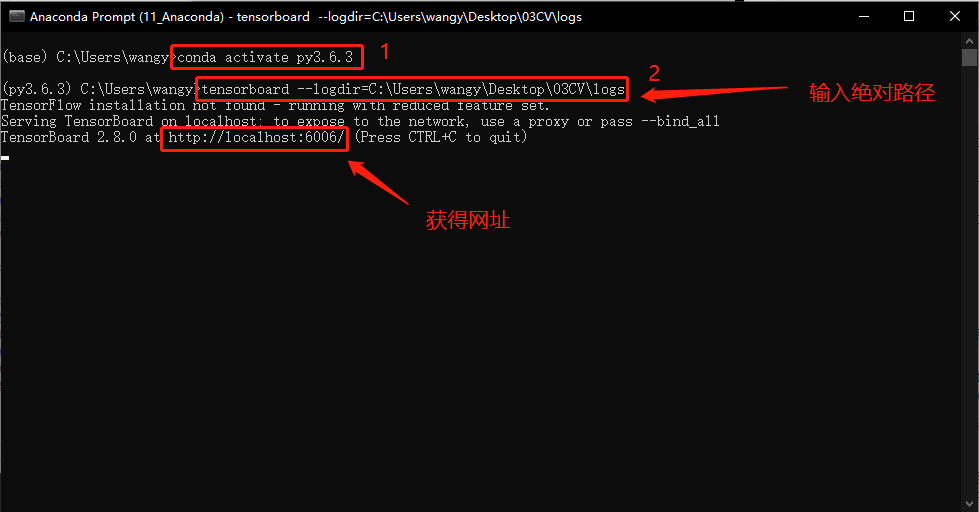

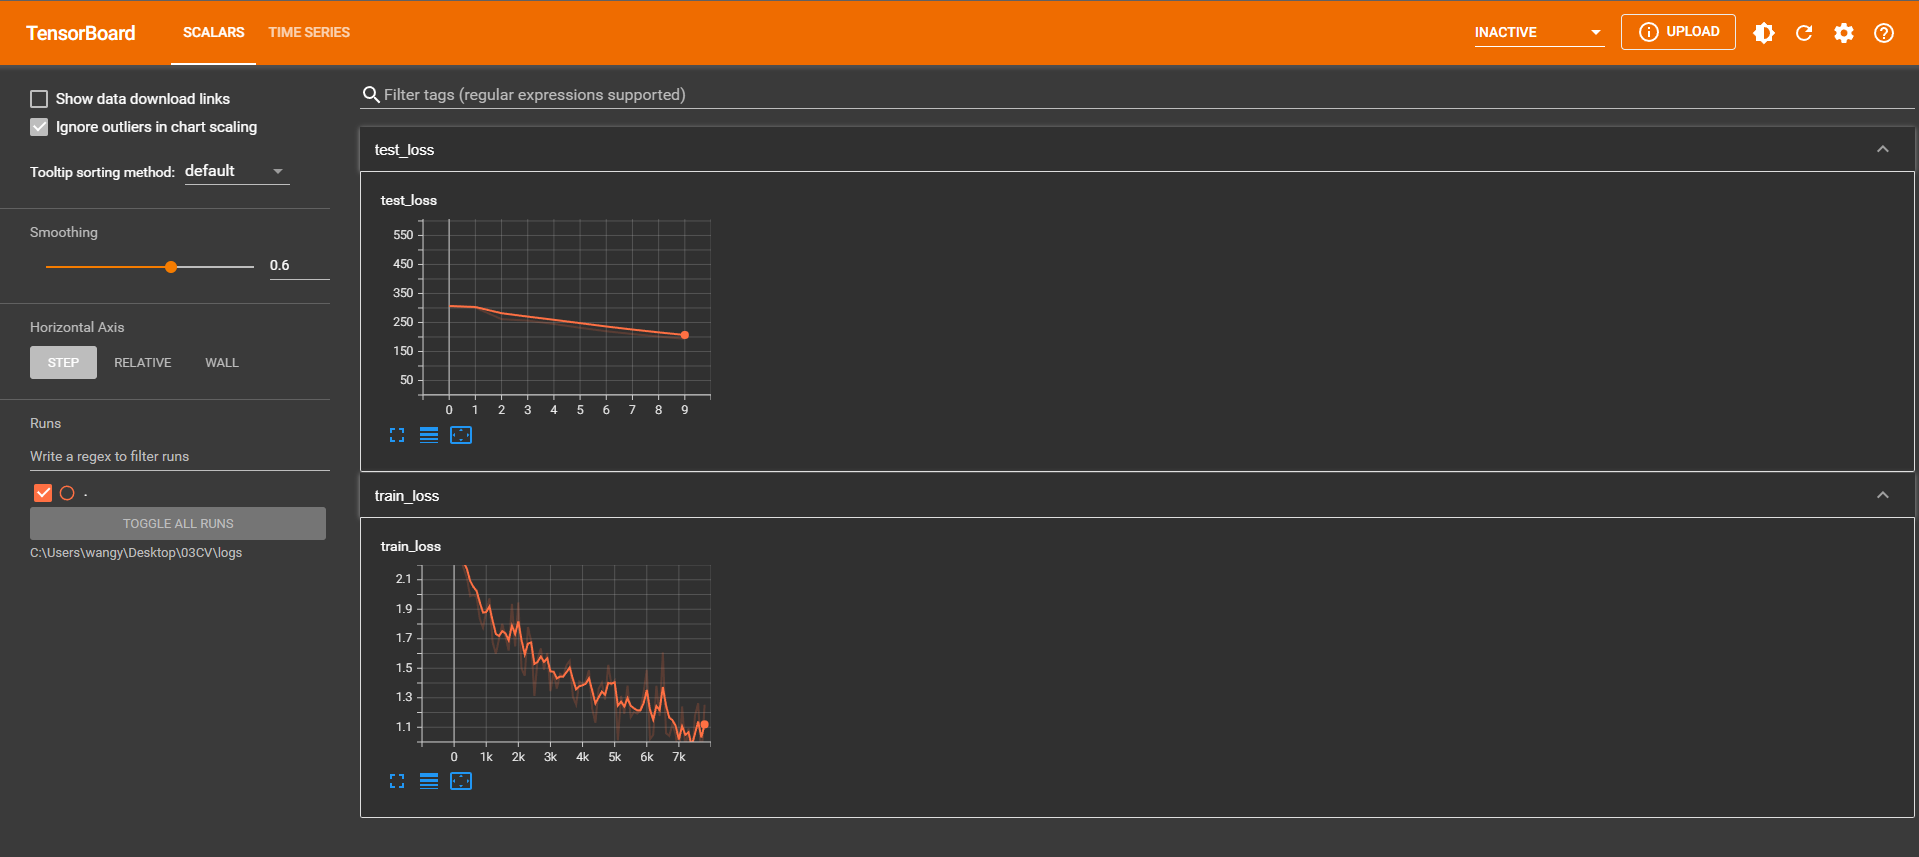

# 7. 保存每一轮后参数

In [6]:
import torchvision
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

# from model import * 相当于把 model中的所有内容写到这里，这里直接把 model 写在这里
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()        
        self.model1 = nn.Sequential(
            nn.Conv2d(3,32,5,1,2),  # 输入通道3，输出通道32，卷积核尺寸5×5，步长1，填充2    
            nn.MaxPool2d(2),
            nn.Conv2d(32,32,5,1,2),
            nn.MaxPool2d(2),
            nn.Conv2d(32,64,5,1,2),
            nn.MaxPool2d(2),
            nn.Flatten(),  # 展平后变成 64*4*4 了
            nn.Linear(64*4*4,64),
            nn.Linear(64,10)
        )
        
    def forward(self, x):
        x = self.model1(x)
        return x

# 准备数据集
train_data = torchvision.datasets.CIFAR10("./dataset",train=True,transform=torchvision.transforms.ToTensor(),download=True)       
test_data = torchvision.datasets.CIFAR10("./dataset",train=False,transform=torchvision.transforms.ToTensor(),download=True)       

# length 长度
train_data_size = len(train_data)
test_data_size = len(test_data)
# 如果train_data_size=10，则打印：训练数据集的长度为：10
print("训练数据集的长度：{}".format(train_data_size))
print("测试数据集的长度：{}".format(test_data_size))

# 利用 Dataloader 来加载数据集
train_dataloader = DataLoader(train_data, batch_size=64)        
test_dataloader = DataLoader(test_data, batch_size=64)

# 创建网络模型
tudui = Tudui() 

# 损失函数
loss_fn = nn.CrossEntropyLoss() # 交叉熵，fn 是 fuction 的缩写

# 优化器
learning = 0.01  # 1e-2 就是 0.01 的意思
optimizer = torch.optim.SGD(tudui.parameters(),learning)   # 随机梯度下降优化器  

# 设置网络的一些参数
# 记录训练的次数
total_train_step = 0
# 记录测试的次数
total_test_step = 0

# 训练的轮次
epoch = 10

# 添加 tensorboard
writer = SummaryWriter("logs")

for i in range(epoch):
    print("-----第 {} 轮训练开始-----".format(i+1))
    
    # 训练步骤开始
    for data in train_dataloader:
        imgs, targets = data
        outputs = tudui(imgs)
        loss = loss_fn(outputs, targets) # 计算实际输出与目标输出的差距
        
        # 优化器对模型调优
        optimizer.zero_grad()  # 梯度清零
        loss.backward() # 反向传播，计算损失函数的梯度
        optimizer.step()   # 根据梯度，对网络的参数进行调优
        
        total_train_step = total_train_step + 1
        if total_train_step % 100 == 0:
            print("训练次数：{}，Loss：{}".format(total_train_step,loss.item()))  # 方式二：获得loss值
            writer.add_scalar("train_loss",loss.item(),total_train_step)
    
    # 测试步骤开始（每一轮训练后都查看在测试数据集上的loss情况）
    total_test_loss = 0
    with torch.no_grad():  # 没有梯度了
        for data in test_dataloader: # 测试数据集提取数据
            imgs, targets = data
            outputs = tudui(imgs)
            loss = loss_fn(outputs, targets) # 仅data数据在网络模型上的损失
            total_test_loss = total_test_loss + loss.item() # 所有loss
    print("整体测试集上的Loss：{}".format(total_test_loss))
    writer.add_scalar("test_loss",total_test_loss,total_test_step)
    total_test_step = total_test_step + 1
    
    torch.save(tudui, "./model/tudui_{}.pth".format(i)) # 保存每一轮训练后的结果
    print("模型已保存")
    
writer.close()

Files already downloaded and verified
Files already downloaded and verified
训练数据集的长度：50000
测试数据集的长度：10000
-----第 1 轮训练开始-----
训练次数：100，Loss：2.296692132949829
训练次数：200，Loss：2.285885810852051
训练次数：300，Loss：2.279501438140869
训练次数：400，Loss：2.2302145957946777
训练次数：500，Loss：2.1076254844665527
训练次数：600，Loss：2.0241076946258545
训练次数：700，Loss：2.0326571464538574
整体测试集上的Loss：313.3945701122284
模型已保存
-----第 2 轮训练开始-----
训练次数：800，Loss：1.8856056928634644
训练次数：900，Loss：1.8258416652679443
训练次数：1000，Loss：1.8736964464187622
训练次数：1100，Loss：2.009686231613159
训练次数：1200，Loss：1.7110859155654907
训练次数：1300，Loss：1.639999508857727
训练次数：1400，Loss：1.7460256814956665
训练次数：1500，Loss：1.804326057434082
整体测试集上的Loss：306.9472336769104
模型已保存
-----第 3 轮训练开始-----
训练次数：1600，Loss：1.7464873790740967
训练次数：1700，Loss：1.6793572902679443
训练次数：1800，Loss：1.9503461122512817
训练次数：1900，Loss：1.7317644357681274
训练次数：2000，Loss：1.9306591749191284
训练次数：2100，Loss：1.5165047645568848
训练次数：2200，Loss：1.459275722503662
训练次数：2300，Loss：1.7940567731857

# 8. argmax作用

In [7]:
import torch
outputs = torch.tensor([[0.1,0.2],
                        [0.05,0.4]])
print(outputs.argmax(0))  # 竖着看，最大值的索引
print(outputs.argmax(1))  # 横着看，最大值的索引
preds = outputs.argmax(0)
targets = torch.tensor([0,1])
print((preds == targets).sum()) # 对应位置相等的个数

tensor([0, 1])
tensor([1, 1])
tensor(2)


# 9. 打印正确率

In [8]:
import torchvision
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

# from model import * 相当于把 model中的所有内容写到这里，这里直接把 model 写在这里
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()        
        self.model1 = nn.Sequential(
            nn.Conv2d(3,32,5,1,2),  # 输入通道3，输出通道32，卷积核尺寸5×5，步长1，填充2    
            nn.MaxPool2d(2),
            nn.Conv2d(32,32,5,1,2),
            nn.MaxPool2d(2),
            nn.Conv2d(32,64,5,1,2),
            nn.MaxPool2d(2),
            nn.Flatten(),  # 展平后变成 64*4*4 了
            nn.Linear(64*4*4,64),
            nn.Linear(64,10)
        )
        
    def forward(self, x):
        x = self.model1(x)
        return x

# 准备数据集
train_data = torchvision.datasets.CIFAR10("./dataset",train=True,transform=torchvision.transforms.ToTensor(),download=True)       
test_data = torchvision.datasets.CIFAR10("./dataset",train=False,transform=torchvision.transforms.ToTensor(),download=True)       

# length 长度
train_data_size = len(train_data)
test_data_size = len(test_data)
# 如果train_data_size=10，则打印：训练数据集的长度为：10
print("训练数据集的长度：{}".format(train_data_size))
print("测试数据集的长度：{}".format(test_data_size))

# 利用 Dataloader 来加载数据集
train_dataloader = DataLoader(train_data, batch_size=64)        
test_dataloader = DataLoader(test_data, batch_size=64)

# 创建网络模型
tudui = Tudui() 

# 损失函数
loss_fn = nn.CrossEntropyLoss() # 交叉熵，fn 是 fuction 的缩写

# 优化器
learning = 0.01  # 1e-2 就是 0.01 的意思
optimizer = torch.optim.SGD(tudui.parameters(),learning)   # 随机梯度下降优化器  

# 设置网络的一些参数
# 记录训练的次数
total_train_step = 0
# 记录测试的次数
total_test_step = 0

# 训练的轮次
epoch = 10

# 添加 tensorboard
writer = SummaryWriter("logs")

for i in range(epoch):
    print("-----第 {} 轮训练开始-----".format(i+1))
    
    # 训练步骤开始
    for data in train_dataloader:
        imgs, targets = data
        outputs = tudui(imgs)
        loss = loss_fn(outputs, targets) # 计算实际输出与目标输出的差距
        
        # 优化器对模型调优
        optimizer.zero_grad()  # 梯度清零
        loss.backward() # 反向传播，计算损失函数的梯度
        optimizer.step()   # 根据梯度，对网络的参数进行调优
        
        total_train_step = total_train_step + 1
        if total_train_step % 100 == 0:
            print("训练次数：{}，Loss：{}".format(total_train_step,loss.item()))  # 方式二：获得loss值
            writer.add_scalar("train_loss",loss.item(),total_train_step)
    
    # 测试步骤开始（每一轮训练后都查看在测试数据集上的loss情况）
    total_test_loss = 0
    total_accuracy = 0
    with torch.no_grad():  # 没有梯度了
        for data in test_dataloader: # 测试数据集提取数据
            imgs, targets = data
            outputs = tudui(imgs)
            loss = loss_fn(outputs, targets) # 仅data数据在网络模型上的损失
            total_test_loss = total_test_loss + loss.item() # 所有loss
            accuracy = (outputs.argmax(1) == targets).sum()
            total_accuracy = total_accuracy + accuracy
            
    print("整体测试集上的Loss：{}".format(total_test_loss))
    print("整体测试集上的正确率：{}".format(total_accuracy/test_data_size))
    writer.add_scalar("test_loss",total_test_loss,total_test_step)
    writer.add_scalar("test_accuracy",total_accuracy/test_data_size,total_test_step)  
    total_test_step = total_test_step + 1
    
    torch.save(tudui, "./model/tudui_{}.pth".format(i)) # 保存每一轮训练后的结果
    print("模型已保存")
    
writer.close()

Files already downloaded and verified
Files already downloaded and verified
训练数据集的长度：50000
测试数据集的长度：10000
-----第 1 轮训练开始-----
训练次数：100，Loss：2.2990777492523193
训练次数：200，Loss：2.279019594192505
训练次数：300，Loss：2.274381637573242
训练次数：400，Loss：2.212763547897339
训练次数：500，Loss：2.0860657691955566
训练次数：600，Loss：2.026383399963379
训练次数：700，Loss：2.0226848125457764
整体测试集上的Loss：318.3006658554077
整体测试集上的正确率：0.26919999718666077
模型已保存
-----第 2 轮训练开始-----
训练次数：800，Loss：1.932318091392517
训练次数：900，Loss：1.8830816745758057
训练次数：1000，Loss：1.9455211162567139
训练次数：1100，Loss：1.973578929901123
训练次数：1200，Loss：1.7392346858978271
训练次数：1300，Loss：1.6807948350906372
训练次数：1400，Loss：1.7497491836547852
训练次数：1500，Loss：1.7937464714050293
整体测试集上的Loss：304.5683034658432
整体测试集上的正确率：0.30399999022483826
模型已保存
-----第 3 轮训练开始-----
训练次数：1600，Loss：1.787430763244629
训练次数：1700，Loss：1.6468796730041504
训练次数：1800，Loss：1.9685696363449097
训练次数：1900，Loss：1.7380374670028687
训练次数：2000，Loss：1.948999285697937
训练次数：2100，Loss：1.5249638557434082
训练次

# 10. 特殊层作用

① model.train()和model.eval()的区别主要在于Batch Normalization和Dropout两层。

② 如果模型中有BN层(Batch Normalization）和 Dropout，需要在训练时添加model.train()。model.train()是保证BN层能够用到每一批数据的均值和方差。对于Dropout，model.train()是随机取一部分网络连接来训练更新参数。

③ 不启用 Batch Normalization 和 Dropout。
如果模型中有BN层(Batch Normalization）和Dropout，在测试时添加model.eval()。model.eval()是保证BN层能够用全部训练数据的均值和方差，即测试过程中要保证BN层的均值和方差不变。对于Dropout，model.eval()是利用到了所有网络连接，即不进行随机舍弃神经元。

④ 训练完train样本后，生成的模型model要用来测试样本。在model(test)之前，需要加上model.eval()，否则的话，有输入数据，即使不训练，它也会改变权值。这是model中含有BN层和Dropout所带来的的性质。

⑤ 在做one classification的时候，训练集和测试集的样本分布是不一样的，尤其需要注意这一点。

In [9]:
import torchvision
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

# from model import * 相当于把 model中的所有内容写到这里，这里直接把 model 写在这里
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()        
        self.model1 = nn.Sequential(
            nn.Conv2d(3,32,5,1,2),  # 输入通道3，输出通道32，卷积核尺寸5×5，步长1，填充2    
            nn.MaxPool2d(2),
            nn.Conv2d(32,32,5,1,2),
            nn.MaxPool2d(2),
            nn.Conv2d(32,64,5,1,2),
            nn.MaxPool2d(2),
            nn.Flatten(),  # 展平后变成 64*4*4 了
            nn.Linear(64*4*4,64),
            nn.Linear(64,10)
        )
        
    def forward(self, x):
        x = self.model1(x)
        return x

# 准备数据集
train_data = torchvision.datasets.CIFAR10("./dataset",train=True,transform=torchvision.transforms.ToTensor(),download=True)       
test_data = torchvision.datasets.CIFAR10("./dataset",train=False,transform=torchvision.transforms.ToTensor(),download=True)       

# length 长度
train_data_size = len(train_data)
test_data_size = len(test_data)
# 如果train_data_size=10，则打印：训练数据集的长度为：10
print("训练数据集的长度：{}".format(train_data_size))
print("测试数据集的长度：{}".format(test_data_size))

# 利用 Dataloader 来加载数据集
train_dataloader = DataLoader(train_data, batch_size=64)        
test_dataloader = DataLoader(test_data, batch_size=64)

# 创建网络模型
tudui = Tudui() 

# 损失函数
loss_fn = nn.CrossEntropyLoss() # 交叉熵，fn 是 fuction 的缩写

# 优化器
learning = 0.01  # 1e-2 就是 0.01 的意思
optimizer = torch.optim.SGD(tudui.parameters(),learning)   # 随机梯度下降优化器  

# 设置网络的一些参数
# 记录训练的次数
total_train_step = 0
# 记录测试的次数
total_test_step = 0

# 训练的轮次
epoch = 10

# 添加 tensorboard
writer = SummaryWriter("logs")

for i in range(epoch):
    print("-----第 {} 轮训练开始-----".format(i+1))
    
    # 训练步骤开始
    tudui.train() # 当网络中有dropout层、batchnorm层时，这些层能起作用
    for data in train_dataloader:
        imgs, targets = data
        outputs = tudui(imgs)
        loss = loss_fn(outputs, targets) # 计算实际输出与目标输出的差距
        
        # 优化器对模型调优
        optimizer.zero_grad()  # 梯度清零
        loss.backward() # 反向传播，计算损失函数的梯度
        optimizer.step()   # 根据梯度，对网络的参数进行调优
        
        total_train_step = total_train_step + 1
        if total_train_step % 100 == 0:
            print("训练次数：{}，Loss：{}".format(total_train_step,loss.item()))  # 方式二：获得loss值
            writer.add_scalar("train_loss",loss.item(),total_train_step)
    
    # 测试步骤开始（每一轮训练后都查看在测试数据集上的loss情况）
    tudui.eval()  # 当网络中有dropout层、batchnorm层时，这些层不能起作用
    total_test_loss = 0
    total_accuracy = 0
    with torch.no_grad():  # 没有梯度了
        for data in test_dataloader: # 测试数据集提取数据
            imgs, targets = data
            outputs = tudui(imgs)
            loss = loss_fn(outputs, targets) # 仅data数据在网络模型上的损失
            total_test_loss = total_test_loss + loss.item() # 所有loss
            accuracy = (outputs.argmax(1) == targets).sum()
            total_accuracy = total_accuracy + accuracy
            
    print("整体测试集上的Loss：{}".format(total_test_loss))
    print("整体测试集上的正确率：{}".format(total_accuracy/test_data_size))
    writer.add_scalar("test_loss",total_test_loss,total_test_step)
    writer.add_scalar("test_accuracy",total_accuracy/test_data_size,total_test_step)  
    total_test_step = total_test_step + 1
    
    torch.save(tudui, "./model/tudui_{}.pth".format(i)) # 保存每一轮训练后的结果
    #torch.save(tudui.state_dict(),"tudui_{}.path".format(i)) # 保存方式二         
    print("模型已保存")
    
writer.close()

Files already downloaded and verified
Files already downloaded and verified
训练数据集的长度：50000
测试数据集的长度：10000
-----第 1 轮训练开始-----
训练次数：100，Loss：2.292330265045166
训练次数：200，Loss：2.2909886837005615
训练次数：300，Loss：2.2775135040283203
训练次数：400，Loss：2.2197389602661133
训练次数：500，Loss：2.1354541778564453
训练次数：600，Loss：2.034959077835083
训练次数：700，Loss：2.0130105018615723
整体测试集上的Loss：319.69296860694885
整体测试集上的正确率：0.2678999900817871
模型已保存
-----第 2 轮训练开始-----
训练次数：800，Loss：1.8924949169158936
训练次数：900，Loss：1.8564952611923218
训练次数：1000，Loss：1.9163199663162231
训练次数：1100，Loss：1.972761631011963
训练次数：1200，Loss：1.698002815246582
训练次数：1300，Loss：1.6668578386306763
训练次数：1400，Loss：1.7467551231384277
训练次数：1500，Loss：1.8171281814575195
整体测试集上的Loss：294.6422094106674
整体测试集上的正确率：0.3321000039577484
模型已保存
-----第 3 轮训练开始-----
训练次数：1600，Loss：1.7753604650497437
训练次数：1700，Loss：1.637514591217041
训练次数：1800，Loss：1.936806559562683
训练次数：1900，Loss：1.710182785987854
训练次数：2000，Loss：1.9697281122207642
训练次数：2100，Loss：1.507324457168579
训练次数